In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#setting seed and choosing 25 observations

np.random.seed(30)
sample = data.sample(n=25)

In [5]:
# mean and maximum Glucose

#sample as dataframe
Glu_sample_mean = pd.Series.mean(sample['Glucose'])
Glu_sample_highest = pd.Series.max(sample['Glucose'])

#data as dataframe
Glu_data_mean = pd.Series.mean(data['Glucose'])
Glu_data_highest = pd.Series.max(data['Glucose'])

In [7]:
# Displaying the figures using formatted string literals
print(f"Sample Mean of Glucose: {Glu_sample_mean}")
print(f"Sample Highest of Glucose: {Glu_sample_highest}")
print(f"\nPopulation Mean of Glucose: {Glu_data_mean}")
print(f"Population Highest of Glucose: {Glu_data_highest}")



Sample Mean of Glucose: 116.56
Sample Highest of Glucose: 183

Population Mean of Glucose: 120.89453125
Population Highest of Glucose: 199


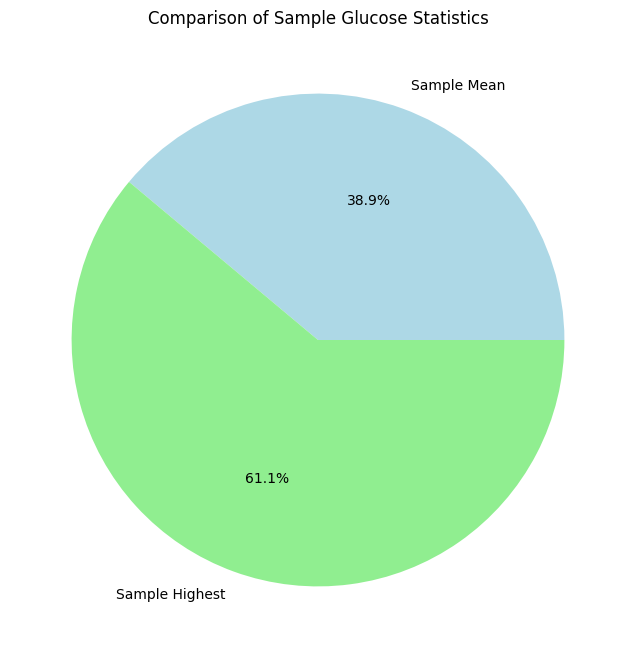

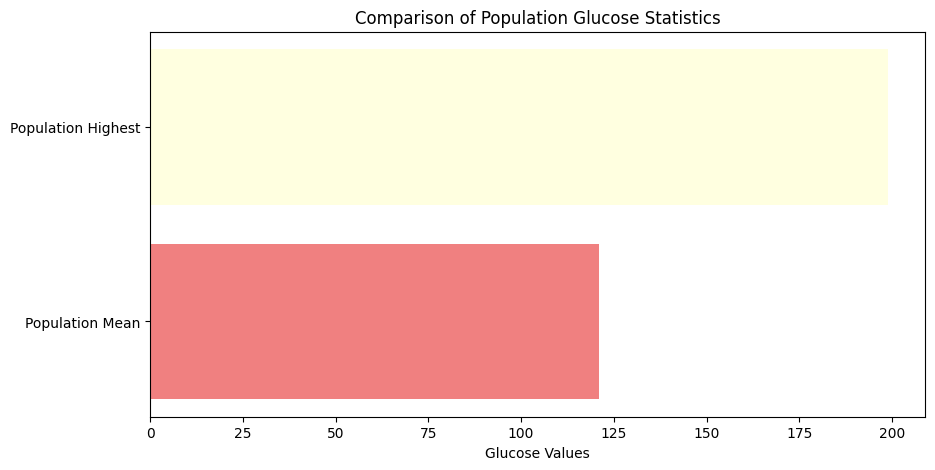

In [21]:
import matplotlib.pyplot as plt

# Data for the sample
labels_sam = ['Sample Mean', 'Sample Highest']
values_sam = [Glu_sample_mean, Glu_sample_highest]

# Create the pie chart for the sample data
plt.figure(figsize=(8, 8))
plt.pie(values_sam, labels=labels_sam, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Comparison of Sample Glucose Statistics')
plt.show()

# Data for the population
labels = ['Population Mean', 'Population Highest']
values = [Glu_data_mean, Glu_data_highest]

# Create the horizontal bar chart for the population data
plt.figure(figsize=(10, 5))
plt.barh(labels, values, color=['lightcoral', 'lightyellow'])
plt.title('Comparison of Population Glucose Statistics')
plt.xlabel('Glucose Values')
plt.show()


In [14]:
# 98th percentile of BMI
sample_bmi_percentile = np.percentile(sample['BMI'], 98)
data_bmi_percentile = np.percentile(data['BMI'], 98)
print("98th Percentile BMI for sample :", sample_bmi_percentile)
print("98th Percentile BMI for population :", data_bmi_percentile)

98th Percentile BMI for sample : 44.484
98th Percentile BMI for population : 47.52599999999996


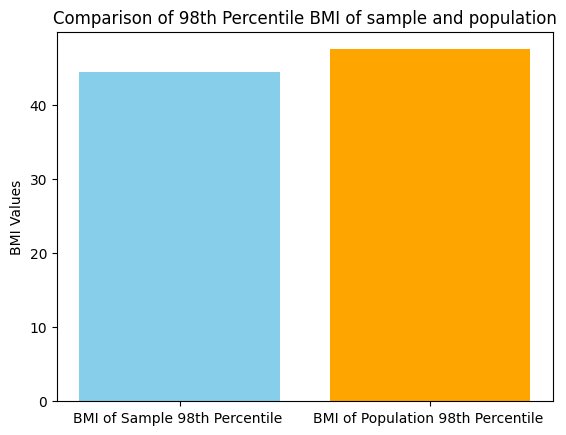

In [17]:
# Creating a bar chart for comparison
labels_per = ['BMI of Sample 98th Percentile ', 'BMI of Population 98th Percentile ']
values_per = [sample_bmi_percentile, data_bmi_percentile]

plt.bar(labels_per, values_per, color=['skyblue', 'orange'])
plt.title('Comparison of 98th Percentile BMI of sample and population')
plt.ylabel('BMI Values')
plt.show()

In [24]:
import numpy as np

# Number of bootstrap samples and size of each sample
sample_num = 500  # Example number of bootstrap samples
sample_size = 150   # Example sample size

# Initialize lists to store results
mean_boot = np.zeros(sample_num)
stddev_boot = np.zeros(sample_num)
perc_boot = np.zeros(sample_num)

# Create bootstrap samples and calculate statistics
for i in range(sample_num):
    # Create a bootstrap sample by sampling with replacement
    boot_sample = np.random.choice(data['BloodPressure'], size=sample_size, replace=True)

    # Calculate mean, standard deviation, and 92nd percentile
    mean_boot[i] = np.mean(boot_sample)
    stddev_boot[i] = np.std(boot_sample)
    perc_boot[i] = np.percentile(boot_sample, 92)

mean_data_bp = data['BloodPressure'].mean()
stddev_data_bp = data['BloodPressure'].std()
perc_92_data_bp = np.percentile(data['BloodPressure'], 92)

print("Mean of BP:", mean_data_bp)
print("Standard Deviation of BP:", stddev_data_bp)
print("92th Percentile of BP:", perc_92_data_bp)

Mean of BP: 69.10546875
Standard Deviation of BP: 19.355807170644777
92th Percentile of BP: 88.0


In [26]:
# bootstrap statistics
boot_mean = np.mean(mean_boot)
boot_stddev = np.mean(stddev_boot)
boot_perc_92 = np.mean(perc_boot)

print("\nBootstrap Mean of BP:", boot_mean)
print("Bootstrap Standard Deviation of BP:", boot_stddev)
print("Bootstrap 92th Percentile of BP:", boot_perc_92)


Bootstrap Mean of BP: 69.11106666666666
Bootstrap Standard Deviation of BP: 19.127271480453942
Bootstrap 92th Percentile of BP: 88.49728000000002


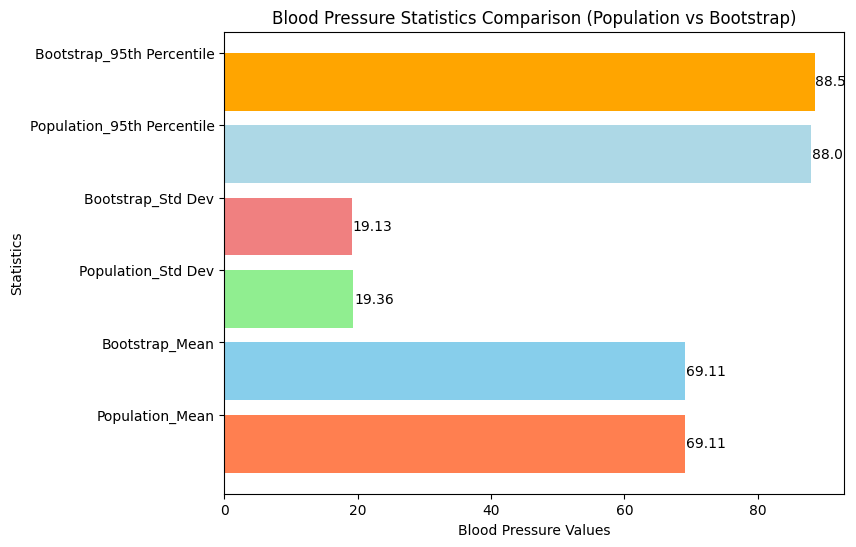

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the plot
labels_all = ['Population_Mean', 'Bootstrap_Mean', 'Population_Std Dev', 'Bootstrap_Std Dev', 'Population_95th Percentile', 'Bootstrap_95th Percentile']
values_all = [mean_data_bp, boot_mean, stddev_data_bp, boot_stddev, perc_92_data_bp, boot_perc_92]

# Create the figure and axis
plt.figure(figsize=(8, 6))

# Define bar width and positions
bar_width = 0.8
index = np.arange(len(labels_all))

# Plot horizontal bars
plt.barh(index - bar_width/2, values_all, bar_width, color=['coral', 'skyblue', 'lightgreen', 'lightcoral', 'lightblue', 'orange'])

# Add labels, title, and legend
plt.xlabel('Blood Pressure Values')
plt.ylabel('Statistics')
plt.title('Blood Pressure Statistics Comparison (Population vs Bootstrap)')
plt.yticks(index, labels_all)

# Add value labels on bars
for i in range(len(values_all)):
    plt.text(values_all[i] + 0.1, i - bar_width/2, round(values_all[i], 2), ha='left', va='center')

# Show plot
plt.show()
